<a href="https://colab.research.google.com/github/Qualot/manim_colab_practice/blob/main/manim_example_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip3 install typing-extensions<5.0.0,>=4.7.1
!pip3 install manim
!pip3 install manim-mobject-svg
!pip3 install IPython --upgrade

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,049 kB]
Get:9 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy/main Sources [2,263 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,340 kB]
Get:11 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy/main amd64 Packages [1,161 kB]
Hit:12 http://archive.ubuntu.com/ubuntu j

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.2/809.2 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.1 MB/s eta 0:00:00
  Attempting uninstall: IPython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.20.0 which is incompatible.


In [1]:
from manim import *
from manim_mobject_svg import *

Manim Community v0.18.0

In [ ]:
%%manim -qm -v WARNING SquareToCircle
class SquareToCircle(Scene):
   def construct(self):
      square = Square()
      circle = Circle()
      circle.set_fill(PINK, opacity=0.5)
      self.play(Create(square))
      self.play(Transform(square, circle))
      self.wait()

In [ ]:
%%manim -qm -v WARNING ManimCELogo
class ManimCELogo(Scene):
    def construct(self):
        self.camera.background_color = "#ece6e2"
        logo_green = "#87c2a5"
        logo_blue = "#525893"
        logo_red = "#e07a5f"
        logo_black = "#343434"
        ds_m = MathTex(r"\mathbb{M}", fill_color=logo_black).scale(7)
        ds_m.shift(2.25 * LEFT + 1.5 * UP)
        circle = Circle(color=logo_green, fill_opacity=1).shift(LEFT)
        square = Square(color=logo_blue, fill_opacity=1).shift(UP)
        triangle = Triangle(color=logo_red, fill_opacity=1).shift(RIGHT)
        logo = VGroup(triangle, square, circle, ds_m)  # order matters
        logo.move_to(ORIGIN)
        self.add(logo)

In [ ]:
%%manim -qm -v WARNING SquareToCircle
class SquareToCircle(Scene):
    def construct(self):
        circle = Circle()
        circle.set_fill(BLUE, opacity=0.5)
        circle.set_stroke(BLUE_E, width=4)
        square = Square()

        self.play(ShowCreation(square))
        self.wait()
        self.play(ReplacementTransform(square, circle))
        self.wait()

In [ ]:
%%manim -qm -v WARNING GraphAreaPlot
class GraphAreaPlot(Scene):
    def construct(self):
        ax = Axes(
            x_range=[0, 5],
            y_range=[0, 6],
            x_axis_config={"numbers_to_include": [2, 3]},
            tips=False,
        )

        labels = ax.get_axis_labels()

        curve_1 = ax.plot(lambda x: 4 * x - x ** 2, x_range=[0, 4], color=BLUE_C)
        curve_2 = ax.plot(
            lambda x: 0.8 * x ** 2 - 3 * x + 4,
            x_range=[0, 4],
            color=GREEN_B,
        )

        line_1 = ax.get_vertical_line(ax.input_to_graph_point(2, curve_1), color=YELLOW)
        line_2 = ax.get_vertical_line(ax.i2gp(3, curve_1), color=YELLOW)

        riemann_area = ax.get_riemann_rectangles(curve_1, x_range=[0.3, 0.6], dx=0.03, color=BLUE, fill_opacity=0.5)
        area = ax.get_area(curve_2, [2, 3], bounded_graph=curve_1, color=GREY, opacity=0.5)

        self.add(ax, labels, curve_1, curve_2, line_1, line_2, riemann_area, area)

In [ ]:
%%manim -qm -v WARNING PolygonOnAxes
class PolygonOnAxes(Scene):
    def get_rectangle_corners(self, bottom_left, top_right):
        return [
            (top_right[0], top_right[1]),
            (bottom_left[0], top_right[1]),
            (bottom_left[0], bottom_left[1]),
            (top_right[0], bottom_left[1]),
        ]

    def construct(self):
        ax = Axes(
            x_range=[0, 10],
            y_range=[0, 10],
            x_length=6,
            y_length=6,
            axis_config={"include_tip": False},
        )

        t = ValueTracker(5)
        k = 25

        graph = ax.plot(
            lambda x: k / x,
            color=YELLOW_D,
            x_range=[k / 10, 10.0, 0.01],
            use_smoothing=False,
        )

        def get_rectangle():
            polygon = Polygon(
                *[
                    ax.c2p(*i)
                    for i in self.get_rectangle_corners(
                        (0, 0), (t.get_value(), k / t.get_value())
                    )
                ]
            )
            polygon.stroke_width = 1
            polygon.set_fill(BLUE, opacity=0.5)
            polygon.set_stroke(YELLOW_B)
            return polygon

        polygon = always_redraw(get_rectangle)

        dot = Dot()
        dot.add_updater(lambda x: x.move_to(ax.c2p(t.get_value(), k / t.get_value())))
        dot.set_z_index(10)

        self.add(ax, graph, dot)
        self.play(Create(polygon))
        self.play(t.animate.set_value(10))
        self.play(t.animate.set_value(k / 10))
        self.play(t.animate.set_value(5))

In [ ]:
%%manim -qm -v WARNING ThreeDLightSourcePosition
class ThreeDLightSourcePosition(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()
        sphere = Surface(
            lambda u, v: np.array([
                1.5 * np.cos(u) * np.cos(v),
                1.5 * np.cos(u) * np.sin(v),
                1.5 * np.sin(u)
            ]), v_range=[0, TAU], u_range=[-PI / 2, PI / 2],
            checkerboard_colors=[RED_D, RED_E], resolution=(15, 32)
        )
        self.renderer.camera.light_source.move_to(3*IN) # changes the source of the light
        self.set_camera_orientation(phi=75 * DEGREES, theta=30 * DEGREES)
        self.add(axes, sphere)

In [ ]:
# from https://github.com/panditsomnath10016git/FSF-mathematics-python-code-archive.git
%%manim -ql -v WARNING SurfacesAnimation
class SurfacesAnimation(SpecialThreeDScene):

    CONFIG = {
        "axes_config": {
            "x_min": 0,
            "x_max": 7,
            "y_min": 0,
            "y_max": 7,
            "z_min": 0,
            "z_max": 5,
            "a": 1,
            "b": 6,
            "c": 2,
            "d": 6,
            "axes_shift": -3 * OUT + 5 * LEFT,
            "x_axis_config": {
                "tick_frequency": 1,
                # "include_tip": False,
            },
            "y_axis_config": {
                "tick_frequency": 1,
                #   "include_tip": False,
            },
            "z_axis_config": {
                "tick_frequency": 1,
                #   "include_tip": False,
            },
            "num_axis_pieces": 1,
        },
        "default_graph_style": {
            "stroke_width": 2,
            "stroke_color": WHITE,
        },
        "default_surface_config": {
            "fill_opacity": 0.5,
            "checkerboard_colors": [LIGHT_GREY],
            "stroke_width": 0.5,
            "stroke_color": WHITE,
            "stroke_opacity": 0.5,
        },
        "Func": lambda x, y: 2 + y / 4 + np.sin(x),
    }

    def construct(self):

        self.setup_axes()
        self.set_camera_orientation(
            distance=35,
            phi=80 * DEGREES,
            theta=-100 * DEGREES,
        )

        fn_text = TextMobject(
            "$z=f(x,y)$", color=PINK, stroke_width=1.5
        )
        self.add_fixed_in_frame_mobjects(fn_text)
        fn_text.to_edge(TOP, buff=MED_SMALL_BUFF)

        riemann_sum_text = TextMobject(
            r"The volume approximated as\\ sum of cuboids",
            color=BLUE,
            stroke_width=1.5,
        )
        riemann_sum_text.to_corner(UR, buff=0.2)

        R = TextMobject("R").set_color(BLACK).scale(3)
        R.move_to(self.axes.input_plane, IN)
        self.add(R)

        # get the surface
        surface = self.get_surface(
            self.axes, lambda x, y: self.Func(x, y)
        )
        surface.set_style(
            fill_opacity=0.8,
            fill_color=PINK,
            stroke_width=0.8,
            stroke_color=WHITE,
        )

        self.begin_ambient_camera_rotation(rate=0.06)
        self.play(Write(surface))
        #   self.add(surface)

        self.get_lines()
        self.wait(1)
        self.add_fixed_in_frame_mobjects(riemann_sum_text)
        self.play(Write(riemann_sum_text))

        cuboids1 = self.show_the_riemmann_sum(
            lambda x, y: np.array([x, y, self.Func(x, y)]),
            fill_opacity=1,
            dl=0.5,
            start_color=BLUE,
            end_color=BLUE_E,
        )
        self.play(ShowCreation(cuboids1), run_time=5)
        self.play(FadeOut(surface))

        cuboids2 = self.show_the_riemmann_sum(
            lambda x, y: np.array([x, y, self.Func(x, y)]),
            fill_opacity=1,
            dl=0.25,
            start_color=BLUE,
            end_color=BLUE_E,
        )
        self.play(ReplacementTransform(cuboids1, cuboids2))

        cuboids3 = self.show_the_riemmann_sum(
            lambda x, y: np.array([x, y, self.Func(x, y)]),
            fill_opacity=1,
            dl=0.1,
            start_color=BLUE,
            end_color=BLUE_E,
            stroke_width=0.1,
        )
        self.play(
            FadeOut(cuboids2),
            ShowCreation(cuboids3),
        )

        self.wait(3)

    def get_surface(self, axes, func, **kwargs):
        config = {
            "u_min": axes.a,
            "u_max": axes.b,
            "v_min": axes.c,
            "v_max": axes.d,
            "resolution": (
                (axes.y_max - axes.y_min)
                // axes.y_axis.tick_frequency,
                (axes.x_max - axes.x_min)
                // axes.x_axis.tick_frequency,
            ),
        }

        config.update(self.default_surface_config)
        config.update(kwargs)
        return ParametricSurface(
            lambda x, y: axes.c2p(x, y, func(x, y)), **config
        )

    def get_lines(self):
        axes = self.axes

        surface_corners = []
        for x, y, z in self.region_corners:
            surface_corners.append([x, y, self.Func(x, y)])

        lines = VGroup()
        for start, end in zip(
            surface_corners, self.region_corners
        ):
            lines.add(self.draw_lines(start, end, "#9CDCEB"))

        labels = [
            (axes.a, 0, 0),
            (axes.b, 0, 0),
            (0, axes.d, 0),
            (0, axes.c, 0),
        ]
        self.region_corners[-1] = self.region_corners[0]
        for start, end in zip(labels, self.region_corners):
            lines.add(self.draw_lines(start, end, "WHITE"))

        # self.add(lines)
        self.play(ShowCreation(lines))

    def draw_lines(self, start, end, color):
        start = self.axes.c2p(*start)
        end = self.axes.c2p(*end)
        line = DashedLine(start, end, color=color)

        return line

    def show_the_riemmann_sum(
        self,
        surface,
        x_min=None,
        x_max=None,
        y_min=None,
        y_max=None,
        dl=0.5,
        stroke_width=0.5,
        stroke_color=BLACK,
        fill_opacity=1,
        start_color=None,
        end_color=None,
    ):
        x_min = x_min if x_min is not None else self.axes.a
        x_max = x_max if x_max is not None else self.axes.b
        y_min = y_min if y_min is not None else self.axes.c
        y_max = y_max if y_max is not None else self.axes.d

        if start_color is None:
            start_color = BLUE
        if end_color is None:
            end_color = BLUE

        cuboids = VGroup()
        x_range = np.arange(x_min, x_max, dl)
        y_range = np.arange(y_min, y_max, dl)
        colors = color_gradient(
            [start_color, end_color], len(x_range)
        )
        for x, color in zip(x_range, colors):
            for y in y_range:
                sample_base = np.array([x, y, 0])
                sample_base_dl = np.array([x + dl, y + dl, 0])
                sample_input = np.array(
                    [x + 0.5 * dl, y + 0.5 * dl, 0]
                )

                base_point = self.axes.c2p(*sample_base)
                base_dx_point = self.axes.c2p(*sample_base_dl)

                surface_val = surface(*sample_input[:2])
                surface_point = self.axes.c2p(*surface_val)

                points = VGroup(
                    *list(
                        map(
                            VectorizedPoint,
                            [
                                base_point,
                                surface_point,
                                base_dx_point,
                            ],
                        )
                    )
                )

                #  self.add(points)
                cuboid = Prism(
                    dimensions=[dl, dl, surface_val[-1]]
                )
                cuboid.replace(points, stretch=True)

                cuboid.set_fill(color, opacity=fill_opacity)
                cuboid.set_stroke(
                    stroke_color, width=stroke_width
                )
                cuboids.add(cuboid)

        return cuboids

    # -------------------------------------------------------
    # customize 3d axes
    def get_three_d_axes(
        self, include_labels=True, include_numbers=True, **kwargs
    ):
        config = dict(self.axes_config)
        config.update(kwargs)
        axes = ThreeDAxes(**config)
        axes.set_stroke(width=2)

        if include_numbers:
            self.add_axes_numbers(axes)

        if include_labels:
            self.add_axes_labels(axes)

        # Adjust axis orientation
        axes.x_axis.rotate(
            90 * DEGREES,
            RIGHT,
            about_point=axes.c2p(0, 0, 0),
        )
        axes.y_axis.rotate(
            90 * DEGREES,
            UP,
            about_point=axes.c2p(0, 0, 0),
        )

        # Add xy-plane
        input_plane = self.get_surface(axes, lambda x, t: 0)
        input_plane.set_style(
            fill_opacity=0.5,
            fill_color=TEAL,
            stroke_width=0,
            stroke_color=WHITE,
        )

        axes.input_plane = input_plane

        self.region_corners = [
            input_plane.get_corner(pos)
            for pos in (DL, DR, UL, UR)
        ]

        return axes

    def setup_axes(self):
        axes = self.get_three_d_axes(include_labels=True)
        axes.add(axes.input_plane)
        axes.scale(1)
        #   axes.center()
        axes.shift(axes.axes_shift)

        self.add(axes)
        self.axes = axes

    def add_axes_numbers(self, axes):
        x_axis = axes.x_axis
        y_axis = axes.y_axis
        tex_vals_x = [
            ("a", axes.a),
            ("b", axes.b),
        ]
        tex_vals_y = [("c", axes.c), ("d", axes.d)]
        x_labels = VGroup()
        y_labels = VGroup()
        for tex, val in tex_vals_x:
            label = TexMobject(tex)
            label.scale(1)
            label.next_to(x_axis.n2p(val), DOWN)
            x_labels.add(label)
        x_axis.add(x_labels)
        x_axis.numbers = x_labels

        for tex, val in tex_vals_y:
            label = TexMobject(tex)
            label.scale(1.5)
            label.next_to(y_axis.n2p(val), LEFT)
            label.rotate(90 * DEGREES)
            y_labels.add(label)

        y_axis.add(y_labels)
        y_axis.numbers = y_labels

        return axes

    def add_axes_labels(self, axes):
        x_label = TexMobject("x")
        x_label.next_to(axes.x_axis.get_end(), RIGHT)
        axes.x_axis.label = x_label

        y_label = TextMobject("y")
        y_label.rotate(90 * DEGREES, OUT)
        y_label.next_to(axes.y_axis.get_end(), UP)
        axes.y_axis.label = y_label

        z_label = TextMobject("z")
        z_label.rotate(90 * DEGREES, RIGHT)
        z_label.next_to(axes.z_axis.get_zenith(), RIGHT)
        axes.z_axis.label = z_label
        for axis in axes:
            axis.add(axis.label)
        return axes

AttributeError: ignored

In [ ]:
#from chatGPT
%%manim -qm -v WARNING ThreeDGraph
class ThreeDGraph(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()
        graph = ParametricSurface(
            lambda u, v: np.array([u, v, u**2 + v**2]),
            u_range=(-2, 2),
            v_range=(-2, 2),
            resolution=(20, 20),
        )

        self.set_camera_orientation(phi=60 * DEGREES, theta=-45 * DEGREES)
        self.play(Create(axes), Create(graph))
        self.wait(3)

In [ ]:
#from ChatGPT
%%manim -qm -v WARNING Surface3DGraph
class Surface3DGraph(Scene):
    def construct(self):
        self.camera.frame.set_elevation(60)
        self.camera.frame.set_azimuth(-150)

        ax = ThreeDAxes()

        z = lambda x, y: x**2 + y**2
        surface = Surface(
            z,
            (-3, -3, -3),
            (3, 3, 3),
            resolution=(100, 100)
        )

        surface.set_style(fill_opacity=1, fill_color=GOLD_B)
        surface.set_style(stroke_color=WHITE)

        self.add(ax, surface)

In [ ]:
%%manim -qh -v WARNING Surface3DGraph

class Surface3DGraph(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(phi=60 * DEGREES, theta=-45 * DEGREES)

        ax = ThreeDAxes()

        z = lambda x, y: x**2 + y**2
        surface = Surface(
            z,
            (-3, -3, -3),
            (3, 3, 3),
            resolution=(100, 100)
        )

        surface.set_style(fill_opacity=1, fill_color=GOLD_B)
        surface.set_style(stroke_color=WHITE)

        self.play(Write(ax), Write(surface))
        self.wait()

In [ ]:
%%manim -qh -v WARNING ParaSurface

class ParaSurface(ThreeDScene):
    def func(self, u, v):
        return np.array([np.cos(u) * np.cos(v), np.cos(u) * np.sin(v), u])

    def construct(self):
        axes = ThreeDAxes(x_range=[-4,4], x_length=8)
        surface = Surface(
            lambda u, v: axes.c2p(*self.func(u, v)),
            u_range=[-PI, PI],
            v_range=[0, TAU],
            resolution=8,
        )
        self.set_camera_orientation(theta=70 * DEGREES, phi=75 * DEGREES)
        self.add(axes, surface)

In [ ]:
%%manim -qh -v WARNING FillByValueExample

class FillByValueExample(ThreeDScene):
    def construct(self):
        resolution_fa = 8
        self.set_camera_orientation(phi=75 * DEGREES, theta=-160 * DEGREES)
        axes = ThreeDAxes(x_range=(0, 5, 1), y_range=(0, 5, 1), z_range=(-1, 1, 0.5))
        def param_surface(u, v):
            x = u
            y = v
            z = np.sin(x) * np.cos(y)
            return z
        surface_plane = Surface(
            lambda u, v: axes.c2p(u, v, param_surface(u, v)),
            resolution=(resolution_fa, resolution_fa),
            v_range=[0, 5],
            u_range=[0, 5],
            )
        surface_plane.set_style(fill_opacity=1)
        surface_plane.set_fill_by_value(axes=axes, colorscale=[(RED, -0.5), (YELLOW, 0), (GREEN, 0.5)], axis=2)
        self.add(axes, surface_plane)

In [ ]:
%%manim -qm -v WARNING ThreeDCube
class ThreeDCube(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes()
        cube = Cube(side_length=4, fill_opacity=0.7, fill_color=BLUE)
        labels = axes.get_axis_labels()

        dot = Dot(ORIGIN)
        arrow = Arrow(ORIGIN, [2, 2, 0], buff=0)


        curve_1 = axes.plot(lambda x: 4 * x - x ** 2, x_range=[0, 4], color=BLUE_C)
        curve_2 = axes.plot(
            lambda x: 0.8 * x ** 2 - 3 * x + 4,
            x_range=[0, 4],
            color=GREEN_B,
        )

        fn_text = Tex("$z=(1+x+y)$").set_color(WHITE)
        self.add_fixed_in_frame_mobjects(fn_text)
        fn_text.to_corner(UL, buff=0.1)
        self.fn_text = fn_text

        line_1 = axes.get_vertical_line(axes.input_to_graph_point(2, curve_1), color=YELLOW)
        line_2 = axes.get_vertical_line(axes.i2gp(3, curve_1), color=YELLOW)

        riemann_area = axes.get_riemann_rectangles(curve_1, x_range=[0.3, 0.6], dx=0.03, color=BLUE, fill_opacity=0.5)
        area = axes.get_area(curve_2, [2, 3], bounded_graph=curve_1, color=GREY, opacity=0.5)

        self.renderer.camera.light_source.move_to(3*IN) # changes the source of the light
        self.set_camera_orientation(phi=75 * DEGREES, theta=30 * DEGREES)
        self.add(axes, labels, cube)
        self.add(dot, arrow)
        self.add(curve_1, curve_2, line_1, line_2, riemann_area, area)


-axes.x_axis.n2p(0) is ... [ 2.5  2.5 -0. ]


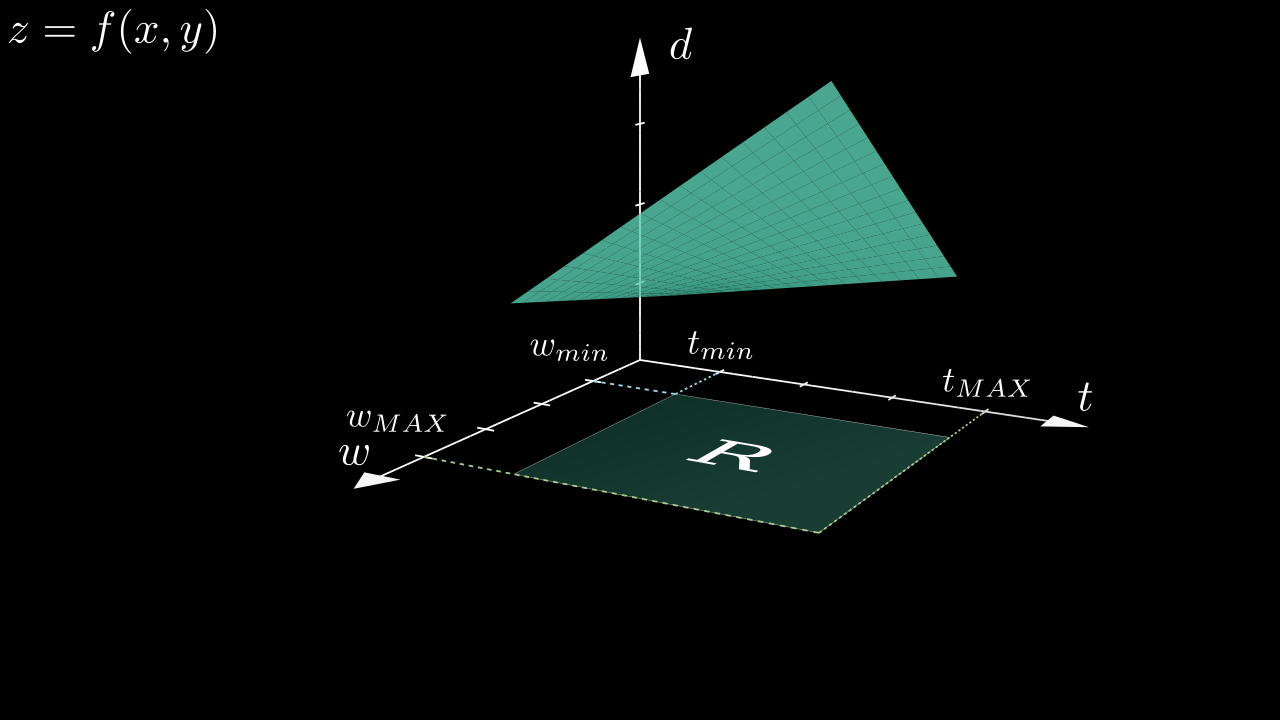

In [ ]:
%%manim -qm -v WARNING ThreeDPlane
class ThreeDPlane(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes(x_range=(0, 5, 1), y_range=(0, 5, 1), z_range=(0, 4, 1), x_length=5, y_length=5, z_length=3.5)
        print(f"-axes.x_axis.n2p(0) is ... {-axes.x_axis.n2p(0)}")
        axes.shift(-axes.x_axis.n2p(0))
        self.add_axes_labels(axes)

        #labels = axes.get_axis_labels()
        axes.a, axes.b, axes.c, axes.d = 1, 4, 1, 4
        axes = self.add_axes_numbers(axes)
        axes = self.add_xy_plane(axes)
        axes = self.add_surface(axes)

        dot = Dot(ORIGIN)
        arrow = Arrow(ORIGIN, [2, 2, 0], buff=0)

        fn_text = Tex("$z=f(x, y)$").set_color(WHITE)
        self.add_fixed_in_frame_mobjects(fn_text)
        fn_text.to_corner(UL, buff=0.1)
        self.fn_text = fn_text

        circle = Circle()  # create a circle
        circle.set_fill(PINK, opacity=0.5)  # set color and transparency
        #circle.next_to(m1, UP, buff=0.1)  # set the position

        self.renderer.camera.light_source.move_to(3*IN) # changes the source of the light
        self.set_camera_orientation(phi=75 * DEGREES, theta=30 * DEGREES)
        self.add(axes)
        #self.add(labels)
        #self.add(dot)
        #self.add(arrow)
        #self.add(circle)

        # self.begin_3dillusion_camera_rotation(rate=2)
        # self.wait(PI/2)
        # self.stop_3dillusion_camera_rotation()


    def add_axes_labels(self, axes):
        label_x_axis = Tex("$w$").set_color(WHITE).move_to(axes.x_axis.n2p(5)).shift(0.3 *OUT)
        label_y_axis = Tex("$t$").set_color(WHITE).move_to(axes.y_axis.n2p(5)).shift(0.3 *OUT)
        label_z_axis = Tex("$d$").set_color(WHITE).move_to(axes.z_axis.n2p(4)).shift(0.5 *UP)

        self.add_fixed_orientation_mobjects(label_x_axis, label_y_axis, label_z_axis)


    def add_axes_numbers(self, axes):
        x_axis = axes.x_axis
        y_axis = axes.y_axis
        tex_vals_x = [
            (r"$w_{min}$", axes.a),
            (r"$w_{MAX}$", axes.b),
        ]
        tex_vals_y = [(r"$t_{min}$", axes.c), (r"$t_{MAX}$", axes.d)]
        x_labels = VGroup()
        y_labels = VGroup()
        for tex, val in tex_vals_x:
            label = Tex(tex)
            label.scale(0.8)
            label.move_to(x_axis.n2p(val)).shift(0.3 *OUT +0.3*DOWN)
            x_labels.add(label)
            self.add_fixed_orientation_mobjects(label)
        x_axis.add(x_labels)
        x_axis.numbers = x_labels

        for tex, val in tex_vals_y:
            label = Tex(tex)
            label.scale(0.8)
            label.move_to(y_axis.n2p(val)).shift(0.3 *OUT)
            y_labels.add(label)
            self.add_fixed_orientation_mobjects(label)
        y_axis.add(y_labels)
        y_axis.numbers = y_labels
        return axes


    def add_xy_plane(self, axes):
        resolution_fa = 1
        def param_trig(u, v):
            x = u
            y = v
            #z = 2 * np.sin(x) + 2 * np.cos(y)
            z = 0
            return z
        trig_plane = axes.plot_surface(
            param_trig,
            resolution=(resolution_fa, resolution_fa),
            u_range = (axes.a, axes.b),
            v_range = (axes.c, axes.d),
            colorscale = [BLUE, GREEN, YELLOW, ORANGE, RED],
            )
        trig_plane.set_style(
            fill_opacity=0.3,
            fill_color=TEAL,
            stroke_width=0.4,
            stroke_color=WHITE,
        )
        R = (
            Text("R")
            .set_color(WHITE)
            .scale(1.5)
            .rotate(PI / 2)
        )
        R.move_to(trig_plane, IN)

        lines_1 = axes.get_lines_to_point(trig_plane.get_corner(UR), color=GREEN_B)
        lines_2 = axes.get_lines_to_point(trig_plane.get_corner(DL), color=BLUE_B)

        axes.add(trig_plane, R, lines_1, lines_2)
        return axes


    def add_surface(self, axes):
        resolution_fa = 16
        def param_trig(u, v):
            x = u
            y = v
            z = 0.2 * u * v + 1.0
            return z
        trig_plane = axes.plot_surface(
            param_trig,
            resolution=(resolution_fa, resolution_fa),
            u_range = (axes.a, axes.b),
            v_range = (axes.c, axes.d),
            colorscale = [BLUE, GREEN, YELLOW, ORANGE, RED],
            )
        trig_plane.set_style(
            fill_opacity=0.8,
            fill_color=TEAL,
            stroke_width=0.0,
            stroke_color=TEAL,
            stroke_opacity=0.0
        )

        axes.add(trig_plane)
        return axes





In [ ]:
%%manim -qm -v WARNING PlotSurfaceExample
class PlotSurfaceExample(ThreeDScene):
    def construct(self):
        resolution_fa = 16
        self.set_camera_orientation(phi=75 * DEGREES, theta=-60 * DEGREES)
        axes = ThreeDAxes(x_range=(-3, 3, 1), y_range=(-3, 3, 1), z_range=(-5, 5, 1))
        def param_trig(u, v):
            x = u
            y = v
            z = 2 * np.sin(x) + 2 * np.cos(y)
            z = 0
            return z
        trig_plane = axes.plot_surface(
            param_trig,
            resolution=(resolution_fa, resolution_fa),
            u_range = (1, 3),
            v_range = (1, 3),
            colorscale = [BLUE, GREEN, YELLOW, ORANGE, RED],
            )
        self.add(axes, trig_plane)

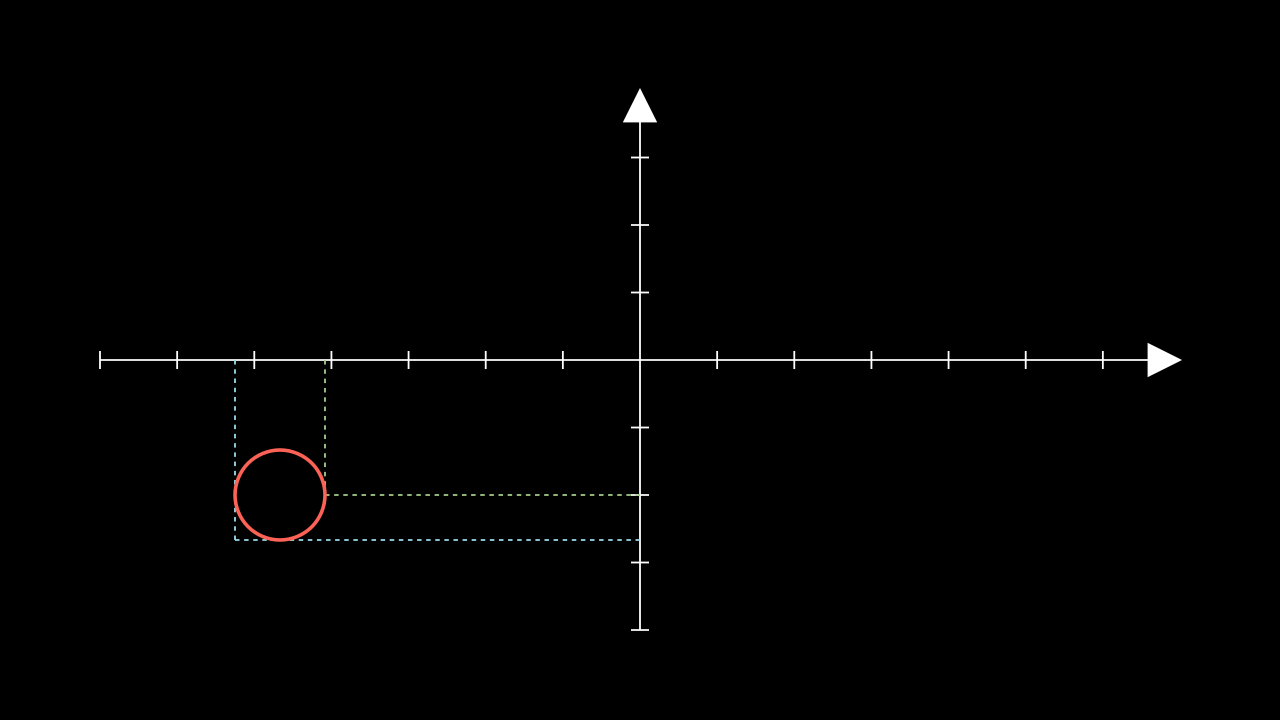

In [ ]:
%%manim -qm -v WARNING GetLinesToPointExample
class GetLinesToPointExample(Scene):
    def construct(self):
        ax = Axes()
        circ = Circle(radius=0.5).move_to([-4, -1.5, 0])

        lines_1 = ax.get_lines_to_point(circ.get_right(), color=GREEN_B)
        lines_2 = ax.get_lines_to_point(circ.get_corner(DL), color=BLUE_B)
        a = Square(color=BLUE)
        b = Circle(color=RED)
        c = VGroup(a, b)
        c.to_svg("group.svg")

        self.add(ax, lines_1, lines_2, circ)



In [ ]:
%%manim -ql -v WARNING PlotPlaneExample
class PlotPlaneExample(ThreeDScene):
    axes_config= {
            "x_range":[0, 7, 1],
            "y_range":[0, 7, 1],
            "z_range":[0, 5, 1],
            "z_axis_config": {
                #"tick_frequency": 1,
                #   "include_tip": False,
            },
            "num_axis_pieces": 1,
            "depth":None,
            "gloss":0.5,
            #"a": 1,
            #"b": 6,
            #"c": 2,
            #"d": 6,
            #"axes_shift": -3 * OUT + 5 * LEFT,
            "x_axis_config": {
                #"tick_frequency": 1,
                #  "include_tip": False,
            },
            "y_axis_config": {
                #"tick_frequency": 1,
                #   "include_tip": False,
            },
            }
    default_graph_style = {
            "stroke_width": 2,
            "stroke_color": WHITE
        }
    default_surface_config = {
            "fill_opacity": 0.5,
            "checkerboard_colors": [LIGHT_GREY],
            "stroke_width": 0.5,
            "stroke_color": WHITE,
            "stroke_opacity": 0.5
        }
    Func = lambda x, y: 2 + y / 4 + np.sin(x)

    def construct(self):
        resolution_fa = 16
        self.set_camera_orientation(phi=75 * DEGREES, theta=-60 * DEGREES)
        #axes = ThreeDAxes(x_range=(-3, 3, 1), y_range=(-3, 3, 1), z_range=(-5, 5, 1))
        self.setup_axes()
        labels = self.axes.get_axis_labels()
        def param_trig(u, v):
            x = u
            y = v
            z = 0
            return z
        trig_plane = self.axes.plot_surface(
            param_trig,
            resolution=(resolution_fa, resolution_fa),
            u_range = (2, 3),
            v_range = (-3, -2),
            colorscale = [BLUE, GREEN, YELLOW, ORANGE, RED],
            )
        self.add(self.axes, labels, trig_plane)

    # -------------------------------------------------------
    # customize 3d axes
    def get_three_d_axes(
        self, include_labels=True, include_numbers=True, **kwargs
    ):
        config = dict(self.axes_config)
        print(f'config is ... {config}')

        #config.update(kwargs)
        #print(f'config is ... {config}')

        print('huga')
        #Error line. https://docs.manim.community/en/stable/reference/manim.mobject.graphing.coordinate_systems.ThreeDAxes.html can be the key to debug...

        axes = ThreeDAxes(**config)
        for key, value in kwargs.items():
            setattr(axes, key, value)

        axes.set_stroke(width=2)
        print('hugahuga')

        if include_numbers:
            self.add_axes_numbers(axes)

        if include_labels:
            self.add_axes_labels(axes)

        # Adjust axis orientation
        axes.x_axis.rotate(
            90 * DEGREES,
            RIGHT,
            about_point=axes.c2p(0, 0, 0),
        )
        axes.y_axis.rotate(
            90 * DEGREES,
            UP,
            about_point=axes.c2p(0, 0, 0),
        )

        # Add xy-plane
        input_plane = self.get_surface(axes, lambda x, t: 0)
        input_plane.set_style(
            fill_opacity=0.5,
            fill_color=TEAL,
            stroke_width=0,
            stroke_color=WHITE,
        )

        axes.input_plane = input_plane

        self.region_corners = [
            input_plane.get_corner(pos)
            for pos in (DL, DR, UL, UR)
        ]

        return axes

    def setup_axes(self):
        print('foo')
        axes = self.get_three_d_axes(include_labels=True, a=1, b=6, c=2, d=6, axes_shift=-3 * OUT + 5 * LEFT)
        print('bar')
        axes.add(axes.input_plane)
        axes.scale(1)
        #   axes.center()
        axes.shift(axes.axes_shift)

        self.add(axes)
        self.axes = axes

    def add_axes_numbers(self, axes):
        x_axis = axes.x_axis
        y_axis = axes.y_axis
        tex_vals_x = [
            ("a", axes.a),
            ("b", axes.b),
        ]
        tex_vals_y = [("c", axes.c), ("d", axes.d)]
        x_labels = VGroup()
        y_labels = VGroup()
        for tex, val in tex_vals_x:
            label = Text(tex)
            label.scale(1)
            label.next_to(x_axis.n2p(val), DOWN)
            x_labels.add(label)
        x_axis.add(x_labels)
        x_axis.numbers = x_labels

        for tex, val in tex_vals_y:
            label = Text(tex)
            label.scale(1.5)
            label.next_to(y_axis.n2p(val), LEFT)
            label.rotate(90 * DEGREES)
            y_labels.add(label)

        y_axis.add(y_labels)
        y_axis.numbers = y_labels

        return axes

    def add_axes_labels(self, axes):
        x_label = Text("x")
        x_label.next_to(axes.x_axis.get_end(), RIGHT)
        axes.x_axis.label = x_label

        y_label = Text("y")
        y_label.rotate(90 * DEGREES, OUT)
        y_label.next_to(axes.y_axis.get_end(), UP)
        axes.y_axis.label = y_label

        z_label = Text("z")
        z_label.rotate(90 * DEGREES, RIGHT)
        z_label.next_to(axes.z_axis.get_zenith(), RIGHT)
        axes.z_axis.label = z_label
        for axis in axes:
            axis.add(axis.label)
        return axes

foo
config is ... {'x_range': [0, 7, 1], 'y_range': [0, 7, 1], 'z_range': [0, 5, 1], 'z_axis_config': {}, 'num_axis_pieces': 1, 'depth': None, 'gloss': 0.5, 'x_axis_config': {}, 'y_axis_config': {}}
huga
hugahuga


AttributeError: ignored

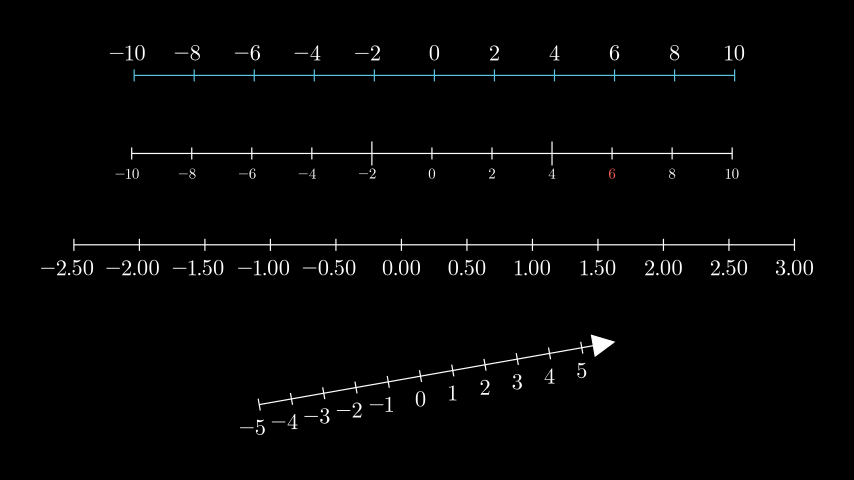

In [ ]:
%%manim -ql -v WARNING NumberLineExample

class NumberLineExample(Scene):
    def construct(self):
        l0 = NumberLine(
            x_range=[-10, 10, 2],
            length=10,
            color=BLUE,
            include_numbers=True,
            label_direction=UP,
        )

        l1 = NumberLine(
            x_range=[-10, 10, 2],
            unit_size=0.5,
            numbers_with_elongated_ticks=[-2, 4],
            include_numbers=True,
            font_size=24,
        )
        num6 = l1.numbers[8]
        num6.set_color(RED)

        l2 = NumberLine(
            x_range=[-2.5, 2.5 + 0.5, 0.5],
            length=12,
            decimal_number_config={"num_decimal_places": 2},
            include_numbers=True,
        )

        l3 = NumberLine(
            x_range=[-5, 5 + 1, 1],
            length=6,
            include_tip=True,
            include_numbers=True,
            rotation=10 * DEGREES,
        )

        line_group = VGroup(l0, l1, l2, l3).arrange(DOWN, buff=1)
        self.add(line_group)

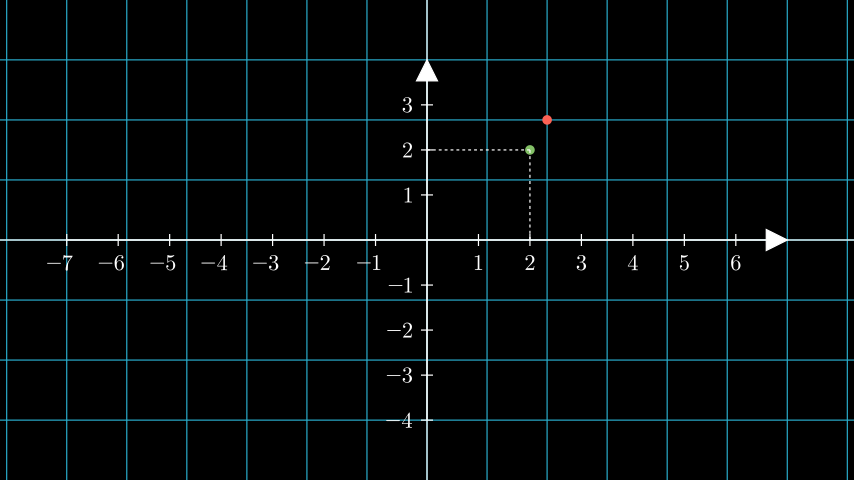

In [ ]:
%%manim -ql -v WARNING CoordsToPointExample

class CoordsToPointExample(Scene):
    def construct(self):
        ax = Axes().add_coordinates()

        # a dot with respect to the axes
        dot_axes = Dot(ax.coords_to_point(2, 2), color=GREEN)
        lines = ax.get_lines_to_point(ax.c2p(2,2))

        # a dot with respect to the scene
        # the default plane corresponds to the coordinates of the scene.
        plane = NumberPlane()
        dot_scene = Dot((2,2,0), color=RED)

        self.add(plane, dot_scene, ax, dot_axes, lines)

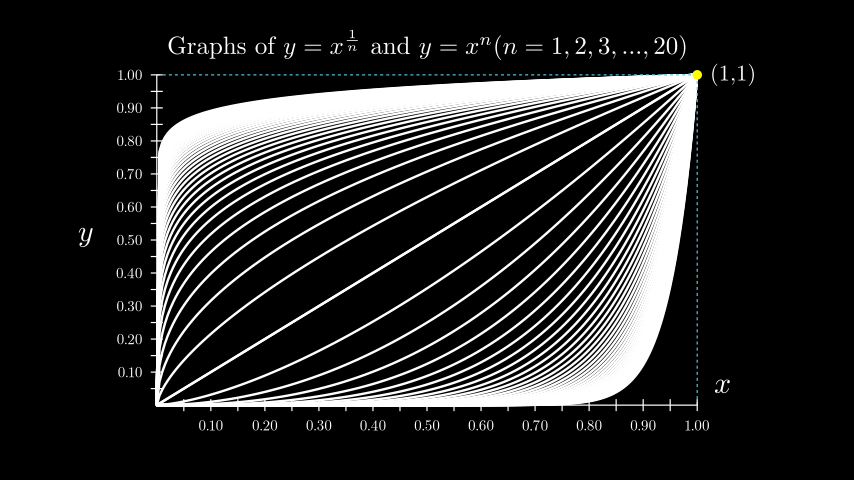

In [ ]:
%%manim -ql -v WARNING CoordSysExample

class CoordSysExample(Scene):
    def construct(self):
        # the location of the ticks depends on the x_range and y_range.
        grid = Axes(
            x_range=[0, 1, 0.05],  # step size determines num_decimal_places.
            y_range=[0, 1, 0.05],
            x_length=9,
            y_length=5.5,
            axis_config={
                "numbers_to_include": np.arange(0, 1 + 0.1, 0.1),
                "font_size": 24,
            },
            tips=False,
        )

        # Labels for the x-axis and y-axis.
        y_label = grid.get_y_axis_label("y", edge=LEFT, direction=LEFT, buff=0.4)
        x_label = grid.get_x_axis_label("x")
        grid_labels = VGroup(x_label, y_label)

        graphs = VGroup()
        for n in np.arange(1, 20 + 0.5, 0.5):
            graphs += grid.plot(lambda x: x ** n, color=WHITE)
            graphs += grid.plot(
                lambda x: x ** (1 / n), color=WHITE, use_smoothing=False
            )

        # Extra lines and labels for point (1,1)
        graphs += grid.get_horizontal_line(grid.c2p(1, 1, 0), color=BLUE)
        graphs += grid.get_vertical_line(grid.c2p(1, 1, 0), color=BLUE)
        graphs += Dot(point=grid.c2p(1, 1, 0), color=YELLOW)
        graphs += Tex("(1,1)").scale(0.75).next_to(grid.c2p(1, 1, 0))
        title = Title(
            # spaces between braces to prevent SyntaxError
            r"Graphs of $y=x^{ {1}\over{n} }$ and $y=x^n (n=1,2,3,...,20)$",
            include_underline=False,
            font_size=40,
        )

        self.add(title, graphs, grid, grid_labels)

In [ ]:
%%manim -ql -v WARNING FixedInFrameMObjectTest

class FixedInFrameMObjectTest(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes(
            x_range=[0, 1, 0.05],  # step size determines num_decimal_places.
            y_range=[0, 1, 0.05],
            x_length=9,
            y_length=5.5,
            axis_config={
                "numbers_to_include": np.arange(0, 1 + 0.1, 0.1),
                "font_size": 24,
            },
            tips=False,
        )
        #axes.shift(-axes.x_axis.n2p(0))

        # Labels for the x-axis and y-axis.
        y_label = axes.get_y_axis_label("y", edge=LEFT, direction=LEFT, buff=0.4)
        x_label = axes.get_x_axis_label("x")
        grid_labels = VGroup(x_label, y_label)

        graphs = VGroup()
        for n in np.arange(1, 20 + 0.5, 0.5):
            graphs += axes.plot(lambda x: x ** n, color=WHITE)
            graphs += axes.plot(
                lambda x: x ** (1 / n), color=WHITE, use_smoothing=False
            )
        self.add(graphs)

        self.set_camera_orientation(phi=75 * DEGREES, theta=-45 * DEGREES)
        text3d = Text("This is a 3D text")
        self.add_fixed_in_frame_mobjects(text3d)
        text3d.to_corner(UL)
        self.add(axes)
        self.wait()

axes.x_axis.unit_size is ... 0.5384615384615384
axes.y_axis.unit_size is ... 1.1666666666666667


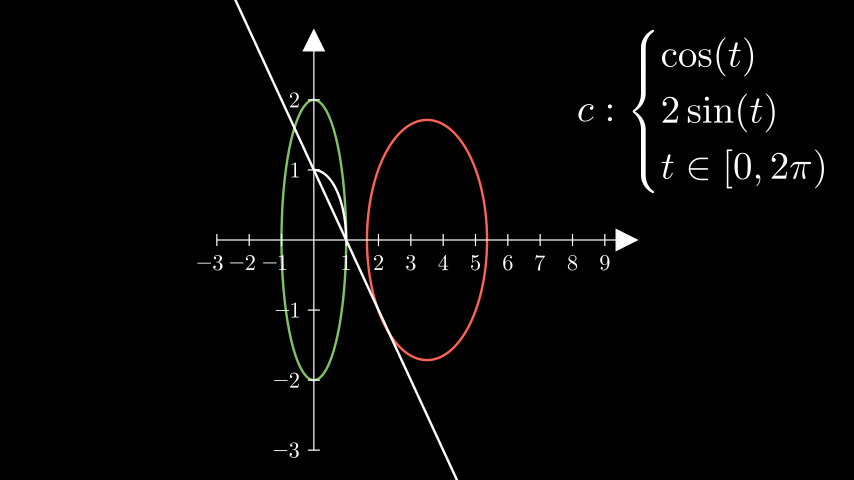

In [ ]:
%%manim -ql -v WARNING ParametricCurveTest
class ParametricCurveTest(Scene):
  def func(self, t):
      return np.array(
          (np.cos(t),
           2.0 * np.sin(t),
           0))

  def construct(self):
    # Define axes
    axes = Axes(
        x_range = [-3, 10, 1],
        y_range = [-3, 3, 1],
        x_length = 7,
        y_length = 7,
        axis_config={"include_numbers": True},
    )

    graphs=VGroup()
    parametric_func = ParametricFunction(self.func, t_range = np.array([0, TAU]), fill_opacity=0).set_color(RED)
    graphs += parametric_func
    graphs += axes.plot_parametric_curve(self.func, t_range = np.array([0, TAU]), fill_opacity=0).set_color(GREEN)
    graphs +=  axes.plot(lambda x: 1.0 - x, color=WHITE)
    graphs += axes.plot_parametric_curve(
        lambda t:np.array((
          t,
          np.sqrt(1-t**2),
          0)), t_range = np.array([0, 1.0]), fill_opacity=0).set_color(WHITE)

    self.add(graphs)


    variable_list = []
    variable_list += ([f"axes.{i}_axis.unit_size" for i in ["x", "y"]])

    if not variable_list:
      print("variable_list[] is empty")
    else:
      for i in variable_list:
        print(f"{i} is ... {eval(i)}")


    equations = MathTex(r"""
      c:\begin{cases}
        \cos(t)\\
        2\sin(t)\\
        t\in [0,2\pi)
    \end{cases}
    """).scale(1.3)
    equations.to_corner(UR)

    self.add(axes, equations)

In [ ]:
%%manim -ql -v WARNING PolygonOnAxes
class PolygonOnAxes(Scene):
    def get_rectangle_corners(self, bottom_left, top_right):
        return [
            (top_right[0], top_right[1]),
            (bottom_left[0], top_right[1]),
            (bottom_left[0], bottom_left[1]),
            (top_right[0], bottom_left[1]),
        ]

    def construct(self):
        ax = Axes(
            x_range=[0, 10],
            y_range=[0, 10],
            x_length=6,
            y_length=6,
            axis_config={"include_tip": False},
        )

        t = ValueTracker(5)
        k = 25

        graph = ax.plot(
            lambda x: k / x,
            color=YELLOW_D,
            x_range=[k / 10, 10.0, 0.01],
            use_smoothing=False,
        )

        def get_rectangle():
            polygon = Polygon(
                *[
                    ax.c2p(*i)
                    for i in self.get_rectangle_corners(
                        (0, 0), (t.get_value(), k / t.get_value())
                    )
                ]
            )
            polygon.stroke_width = 1
            polygon.set_fill(BLUE, opacity=0.5)
            polygon.set_stroke(YELLOW_B)
            return polygon

        polygon = always_redraw(get_rectangle)

        dot = Dot()
        dot.add_updater(lambda x: x.move_to(ax.c2p(t.get_value(), k / t.get_value())))
        dot.set_z_index(10)

        self.add(ax, graph, dot)
        self.play(Create(polygon))
        self.play(t.animate.set_value(10))
        self.play(t.animate.set_value(k / 10))
        self.play(t.animate.set_value(5))

cardioid is ... ParametricFunction


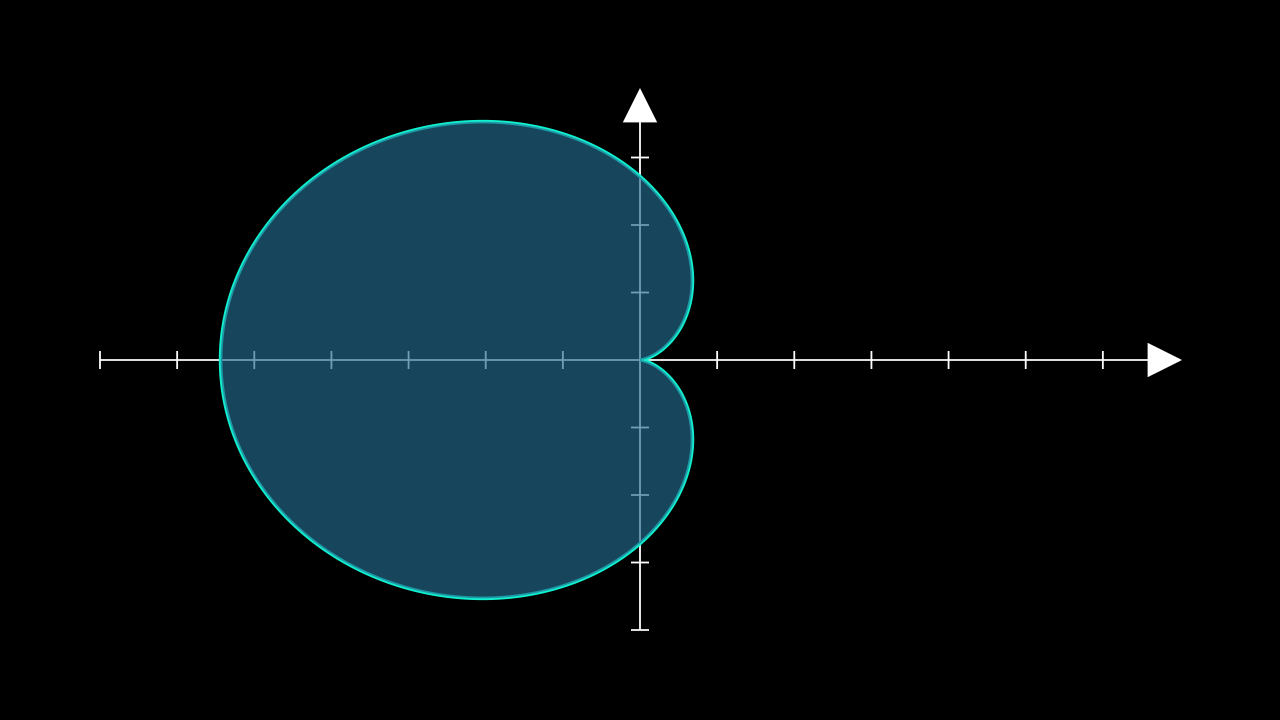

In [ ]:
%%manim -qm -v WARNING ParametricCurvePolygonExample

class ParametricCurvePolygonExample(Scene):
    def construct(self):
        ax = Axes()
        cardioid = ax.plot_parametric_curve(
            lambda t: np.array(
                [
                    np.exp(1) * np.cos(t) * (1 - np.cos(t)),
                    np.exp(1) * np.sin(t) * (1 - np.cos(t)),
                    0,
                ]
            ),
            t_range=[0, 2 * PI],
            color="#0FF1CE",
        )

        print(f"cardioid is ... {cardioid}")

        cardioid_points = cardioid.points  # Extract points from ParametricFunction
        cardioid_poly = Polygon(
            *cardioid_points,
            stroke_width=0.1,
            fill_color=BLUE_E,
            fill_opacity=0.65,
        )
        self.add(ax, cardioid, cardioid_poly)

In [ ]:
%%manim -qm -v WARNING ParametricCurvePolygonAnimationExample

class ParametricCurvePolygonAnimationExample(Scene):
    def construct(self):
        ax = Axes()
        y_tracker = ValueTracker(1.0)
        self.y_tracker = y_tracker
        y = y_tracker.get_value

        def cardioid_function(t):
            return np.array([
                y() * (np.exp(1) * np.cos(t) * (1 - np.cos(t))),
                y() * (np.exp(1) * np.sin(t) * (1 - np.cos(t))),
                0,
            ])

        cardioid = always_redraw(lambda: ax.plot_parametric_curve(
            cardioid_function,
            t_range=[0, 2 * PI],
            color="#0FF1CE",
        ))

        cardioid_points = cardioid.points  # Extract points from ParametricFunction
        cardioid_poly = Polygon(
            *cardioid_points,
            stroke_width=0.1,
            fill_color=BLUE_E,
            fill_opacity=0.65,
        )
        self.add(cardioid_poly)


        cardioid.suspend_updating()
        self.play(
            Write(VGroup(cardioid)), run_time=3
        )
        self.play(y_tracker.animate.set_value(2.0))
        cardioid.suspend_updating()

        print(f"cardioid is ... {cardioid}")

        self.add(ax)



cardioid is ... ParametricFunction


In [15]:
def step_function(x, threshold=0):
    """
    Step function that returns 0 if x is less than the threshold, and 1 otherwise.

    Parameters:
    - x: Input value
    - threshold: Threshold value (default is 0)

    Returns:
    - 0 if x < threshold, 1 otherwise
    """
    return 0 if x < threshold else 1

In [23]:
def smoothstep(edge0, edge1, x):
    """
    Smoothstep function that returns a smooth interpolation between 0 and 1 based on input value x.

    Parameters:
    - edge0: Lower edge
    - edge1: Upper edge
    - x: Input value

    Returns:
    - Smooth interpolation between 0 and 1
    """
    # Clamp x to the range [0, 1]
    x = max(0.0, min(1.0, (x - edge0) / (edge1 - edge0)))

    # Smooth interpolation using Hermite interpolation
    return x * x * (3 - 2 * x)

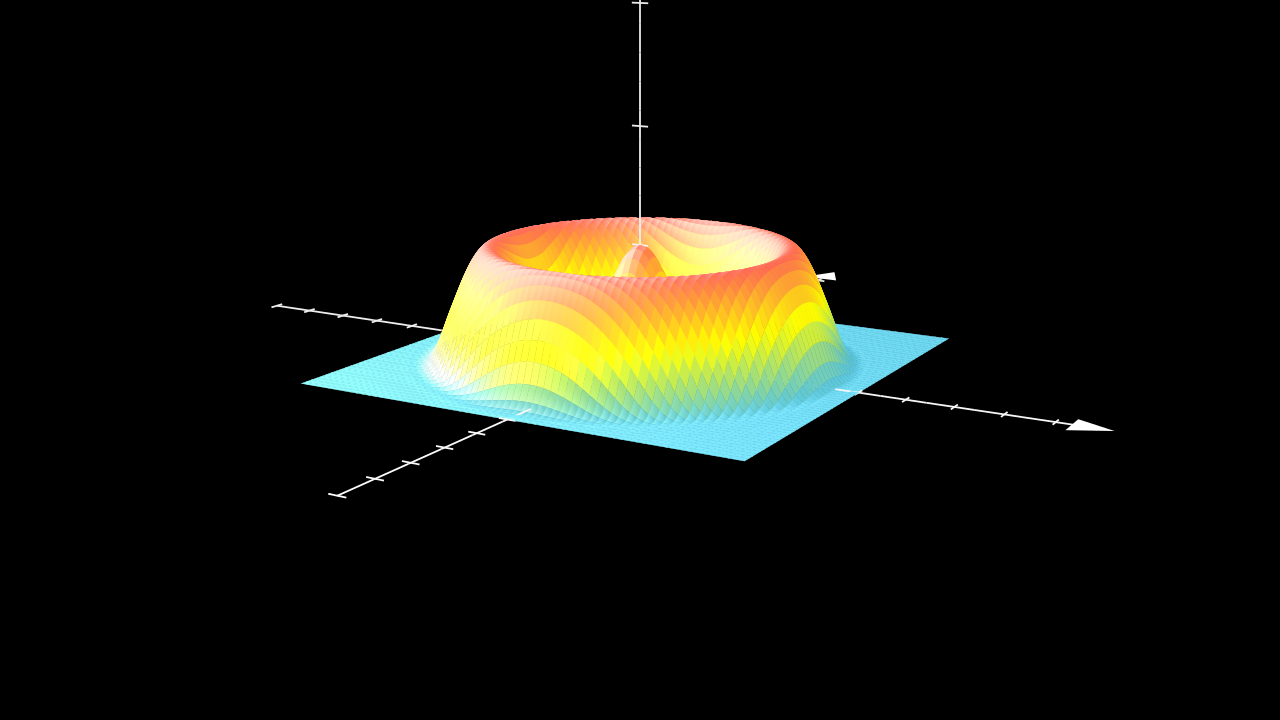

In [24]:
%%manim -qm -v WARNING PlotSurfaceExample
class PlotSurfaceExample(ThreeDScene):
    def construct(self):
        resolution_fa = 64
        self.set_camera_orientation(phi=75 * DEGREES, theta=-60 * DEGREES)
        axes = ThreeDAxes(x_range=(-10, 10, 1), y_range=(-10, 10, 1), z_range=(0, 5, 1))
        def param_trig(u, v):
            x = u
            y = v
            R = np.sqrt(u**2 + v**2)
            z = np.cos(R)**2 * (1.0 - smoothstep(4.0, 5.0, R))

            #z = 2 * np.sin(x) + 2 * np.cos(y)
            return z
        trig_plane = axes.plot_surface(
            param_trig,
            resolution=(resolution_fa, resolution_fa),
            u_range = (-5, 5),
            v_range = (-5, 5),
            colorscale = [BLUE, GREEN, YELLOW, ORANGE, RED],
            )
        trig_plane.set_fill_by_value(axes=axes, colorscale=[(BLUE, 0.0), (YELLOW, 0.5), (RED, 1.0)], axis=2)

        self.add(axes, trig_plane)



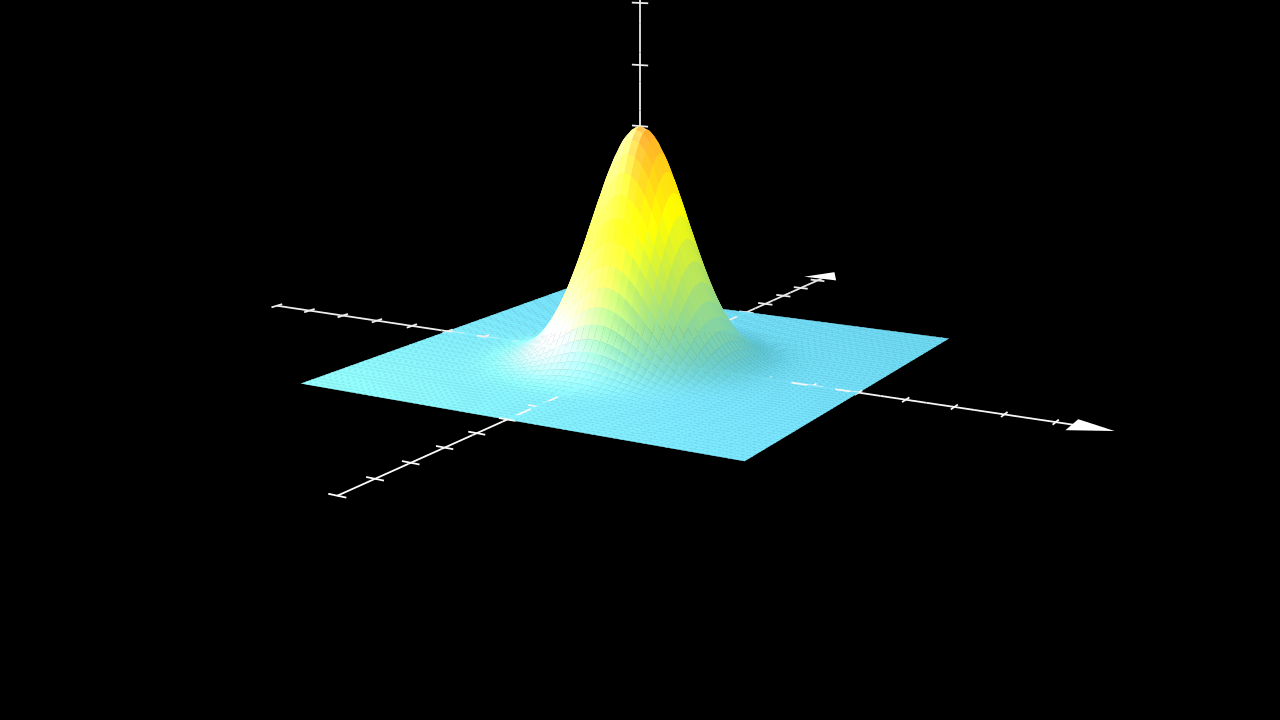

In [9]:
%%manim -qm -v WARNING PlotGaussianSurfaceExample
class PlotGaussianSurfaceExample(ThreeDScene):
    def construct(self):
        resolution_fa = 64
        self.set_camera_orientation(phi=75 * DEGREES, theta=-60 * DEGREES)
        axes = ThreeDAxes(x_range=(-10, 10, 1), y_range=(-10, 10, 1), z_range=(0, 1.0, 0.1))
        def param_trig(u, v):
            x = u
            y = v
            R = np.sqrt(u**2 + v**2)
            #z = np.sin(R)**2
            z = 1.0 / np.sqrt(2.0 * np.pi) * np.exp(-0.5* R**2)

            #z = 2 * np.sin(x) + 2 * np.cos(y)
            return z
        trig_plane = axes.plot_surface(
            param_trig,
            resolution=(resolution_fa, resolution_fa),
            u_range = (-5, 5),
            v_range = (-5, 5),
            colorscale = [BLUE, GREEN, YELLOW, ORANGE, RED],
            )
        trig_plane.set_fill_by_value(axes=axes, colorscale=[(BLUE, 0.0), (YELLOW, 0.25), (RED, 0.5)], axis=2)
        self.add(axes, trig_plane)

In [16]:
a=1.0
step_function(a, threshold = 0.0)

1